# Zillow Exploration

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from wrangle_zillow import prep_zillow

## First lets get our data

In [2]:
zillow = prep_zillow()
zillow

/Users/ryanmccall/codeup-data-science/ds-methodologies-exercises/clustering/wrangle_zillow.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow.calculatedfinishedsquarefeet[zillow.calculatedfinishedsquarefeet.isna()] = zillow.calculatedfinishedsquarefeet.median()


id  parcelid  bathroomcnt  bedroomcnt  buildingqualitytypeid  \
0      1727539  14297519          3.5         4.0                    6.0   
1      1387261  17052889          1.0         2.0                    6.0   
2        11677  14186244          2.0         3.0                    6.0   
3      2288172  12177905          3.0         4.0                    8.0   
4      1970746  10887214          3.0         3.0                    8.0   
...        ...       ...          ...         ...                    ...   
77376   673515  11000655          2.0         2.0                    6.0   
77377  2968375  17239384          2.0         4.0                    6.0   
77378  1843709  12773139          1.0         3.0                    4.0   
77379  1187175  12826780          2.0         3.0                    6.0   
77380  2455685  13083743          2.0         3.0                    4.0   

       calculatedfinishedsquarefeet  finishedsquarefeet12    fips  \
0                            3100.0                3100.0  6059.0   
1                            1465.0                1465.0  6111.0   
2                            1243.0                1243.0  6059.0   
3                            2376.0                2376.0  6037.0   
4                            1312.0                1312.0  6037.0   
...                             ...                   ...     ...   
77376                        1286.0                1286.0  6037.0   
77377                        1612.0                1612.0  6111.0   
77378                        1032.0                1032.0  6037.0   
77379                        1762.0                1762.0  6037.0   
77380                        1050.0                1050.0  6037.0   

       fullbathcnt    latitude  ...  structuretaxvaluedollarcnt  \
0              3.0  33634931.0  ...                    485713.0   
1              1.0  34449266.0  ...                     88000.0   
2              2.0  33886168.0  ...                     85289.0   
3              3.0  34245180.0  ...                    108918.0   
4              3.0  34185120.0  ...                     73681.0   
...            ...         ...  ...                         ...   
77376          2.0  34245368.0  ...                     70917.0   
77377          2.0  34300140.0  ...                     50683.0   
77378          1.0  34040895.0  ...                     32797.0   
77379          2.0  33937685.0  ...                    140000.0   
77380          2.0  34010864.0  ...                     77118.0   

       taxvaluedollarcnt assessmentyear  landtaxvaluedollarcnt taxamount  \
0              1023282.0         2016.0               537569.0  11013.72   
1               464000.0         2016.0               376000.0   5672.48   
2               564778.0         2016.0               479489.0   6488.30   
3               145143.0         2016.0                36225.0   1777.51   
4               119407.0         2016.0                45726.0   1533.89   
...                  ...            ...                    ...       ...   
77376           354621.0         2016.0               283704.0   4478.43   
77377            67205.0         2016.0                16522.0   1107.48   
77378            49546.0         2016.0                16749.0    876.43   
77379           522000.0         2016.0               382000.0   6317.15   
77380           259334.0         2016.0               182216.0   3345.78   

       censustractandblock  logerror  transactiondate  heatingorsystemdesc  \
0             6.059063e+13  0.025595       2017-01-01                 LAR1   
1             6.111001e+13  0.055619       2017-01-01                 LAR1   
2             6.059022e+13  0.005383       2017-01-01                 LAR1   
3             6.037300e+13 -0.103410       2017-01-01           LCR110000*   
4             6.037124e+13  0.006940       2017-01-01                 LAR3   
...                    ...       ...              ...                  ...   
77376 

## Now let's split the data before checking it out

In [3]:
train, test = train_test_split(zillow, train_size=0.8, random_state=13)
train, val = train_test_split(zillow, train_size=0.8, random_state=13)
train

id  parcelid  bathroomcnt  bedroomcnt  buildingqualitytypeid  \
1276    527786  11962313          1.0         2.0                    4.0   
16177  1655136  14603534          2.0         2.0                    6.0   
16351  2144782  14245831          1.5         3.0                    6.0   
75971   563843  14243531          2.0         3.0                    6.0   
30329   302247  11526522          2.0         2.0                    9.0   
...        ...       ...          ...         ...                    ...   
40848   580311  14753399          2.5         3.0                    6.0   
28118  1879107  11845166          3.0         3.0                    7.0   
72866  2155568  12548418          2.0         2.0                    6.0   
37359  2085212  14270176          2.5         3.0                    6.0   
52440  2045325  10918164          4.0         4.0                    7.0   

       calculatedfinishedsquarefeet  finishedsquarefeet12    fips  \
1276                          856.0                 856.0  6037.0   
16177                        1052.0                1052.0  6059.0   
16351                        1211.0                1211.0  6059.0   
75971                        1710.0                1710.0  6059.0   
30329                        1952.0                1952.0  6037.0   
...                             ...                   ...     ...   
40848                        1374.0                1374.0  6059.0   
28118                        1930.0                1930.0  6037.0   
72866                        1593.0                1593.0  6037.0   
37359                        1924.0                1924.0  6059.0   
52440                        2490.0                2490.0  6037.0   

       fullbathcnt    latitude  ...  structuretaxvaluedollarcnt  \
1276           1.0  34117232.0  ...                     25242.0   
16177          2.0  33667397.0  ...                    242046.0   
16351          1.0  33770815.0  ...                     65788.0   
75971          2.0  33773323.0  ...                     51864.0   
30329          2.0  33985700.0  ...                    301112.0   
...            ...         ...  ...                         ...   
40848          2.0  33575045.0  ...                    134953.0   
28118          3.0  34058700.0  ...                    275000.0   
72866          2.0  33765600.0  ...                    357144.0   
37359          2.0  33680490.0  ...                    188964.0   
52440          4.0  34145772.0  ...                    191847.0   

       taxvaluedollarcnt assessmentyear  landtaxvaluedollarcnt taxamount  \
1276             58354.0         2016.0                33112.0    765.87   
16177           429000.0         2016.0               186954.0   4848.40   
16351           456393.0         2016.0               390605.0   5170.48   
75971            77880.0         2016.0                26016.0   1214.62   
30329           433158.0         2016.0               132046.0   5290.53   
...                  ...            ...                    ...       ...   
40848           527000.0         2016.0               392047.0   5379.60   
28118           630953.0         2016.0               355953.0   8121.79   
72866           595240.0         2016.0               238096.0   7092.73   
37359           459060.0         2016.0               270096.0   5470.40   
52440           976841.0         2016.0               784994.0  11884.94   

       censustractandblock  logerror  transactiondate  heatingorsystemdesc  \
1276          6.037186e+13  0.314515       2017-01-06                 LAR1   
16177         6.059063e+13 -0.019215       2017-03-10                 LAR1   
16351         6.059076e+13 -0.063000       2017-03-13                 LAR1   
75971         6.059076e+13  0.048322       2017-09-13                 LAR1   
30329         6.037275e+13  0.031406       2017-04-27                LARD2   
...                    ...       ...              ...                  ...   
40848 

## Next let's plot all continuous or numeric/ordered variables against each other in scatterplots, or through a pairplot.

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


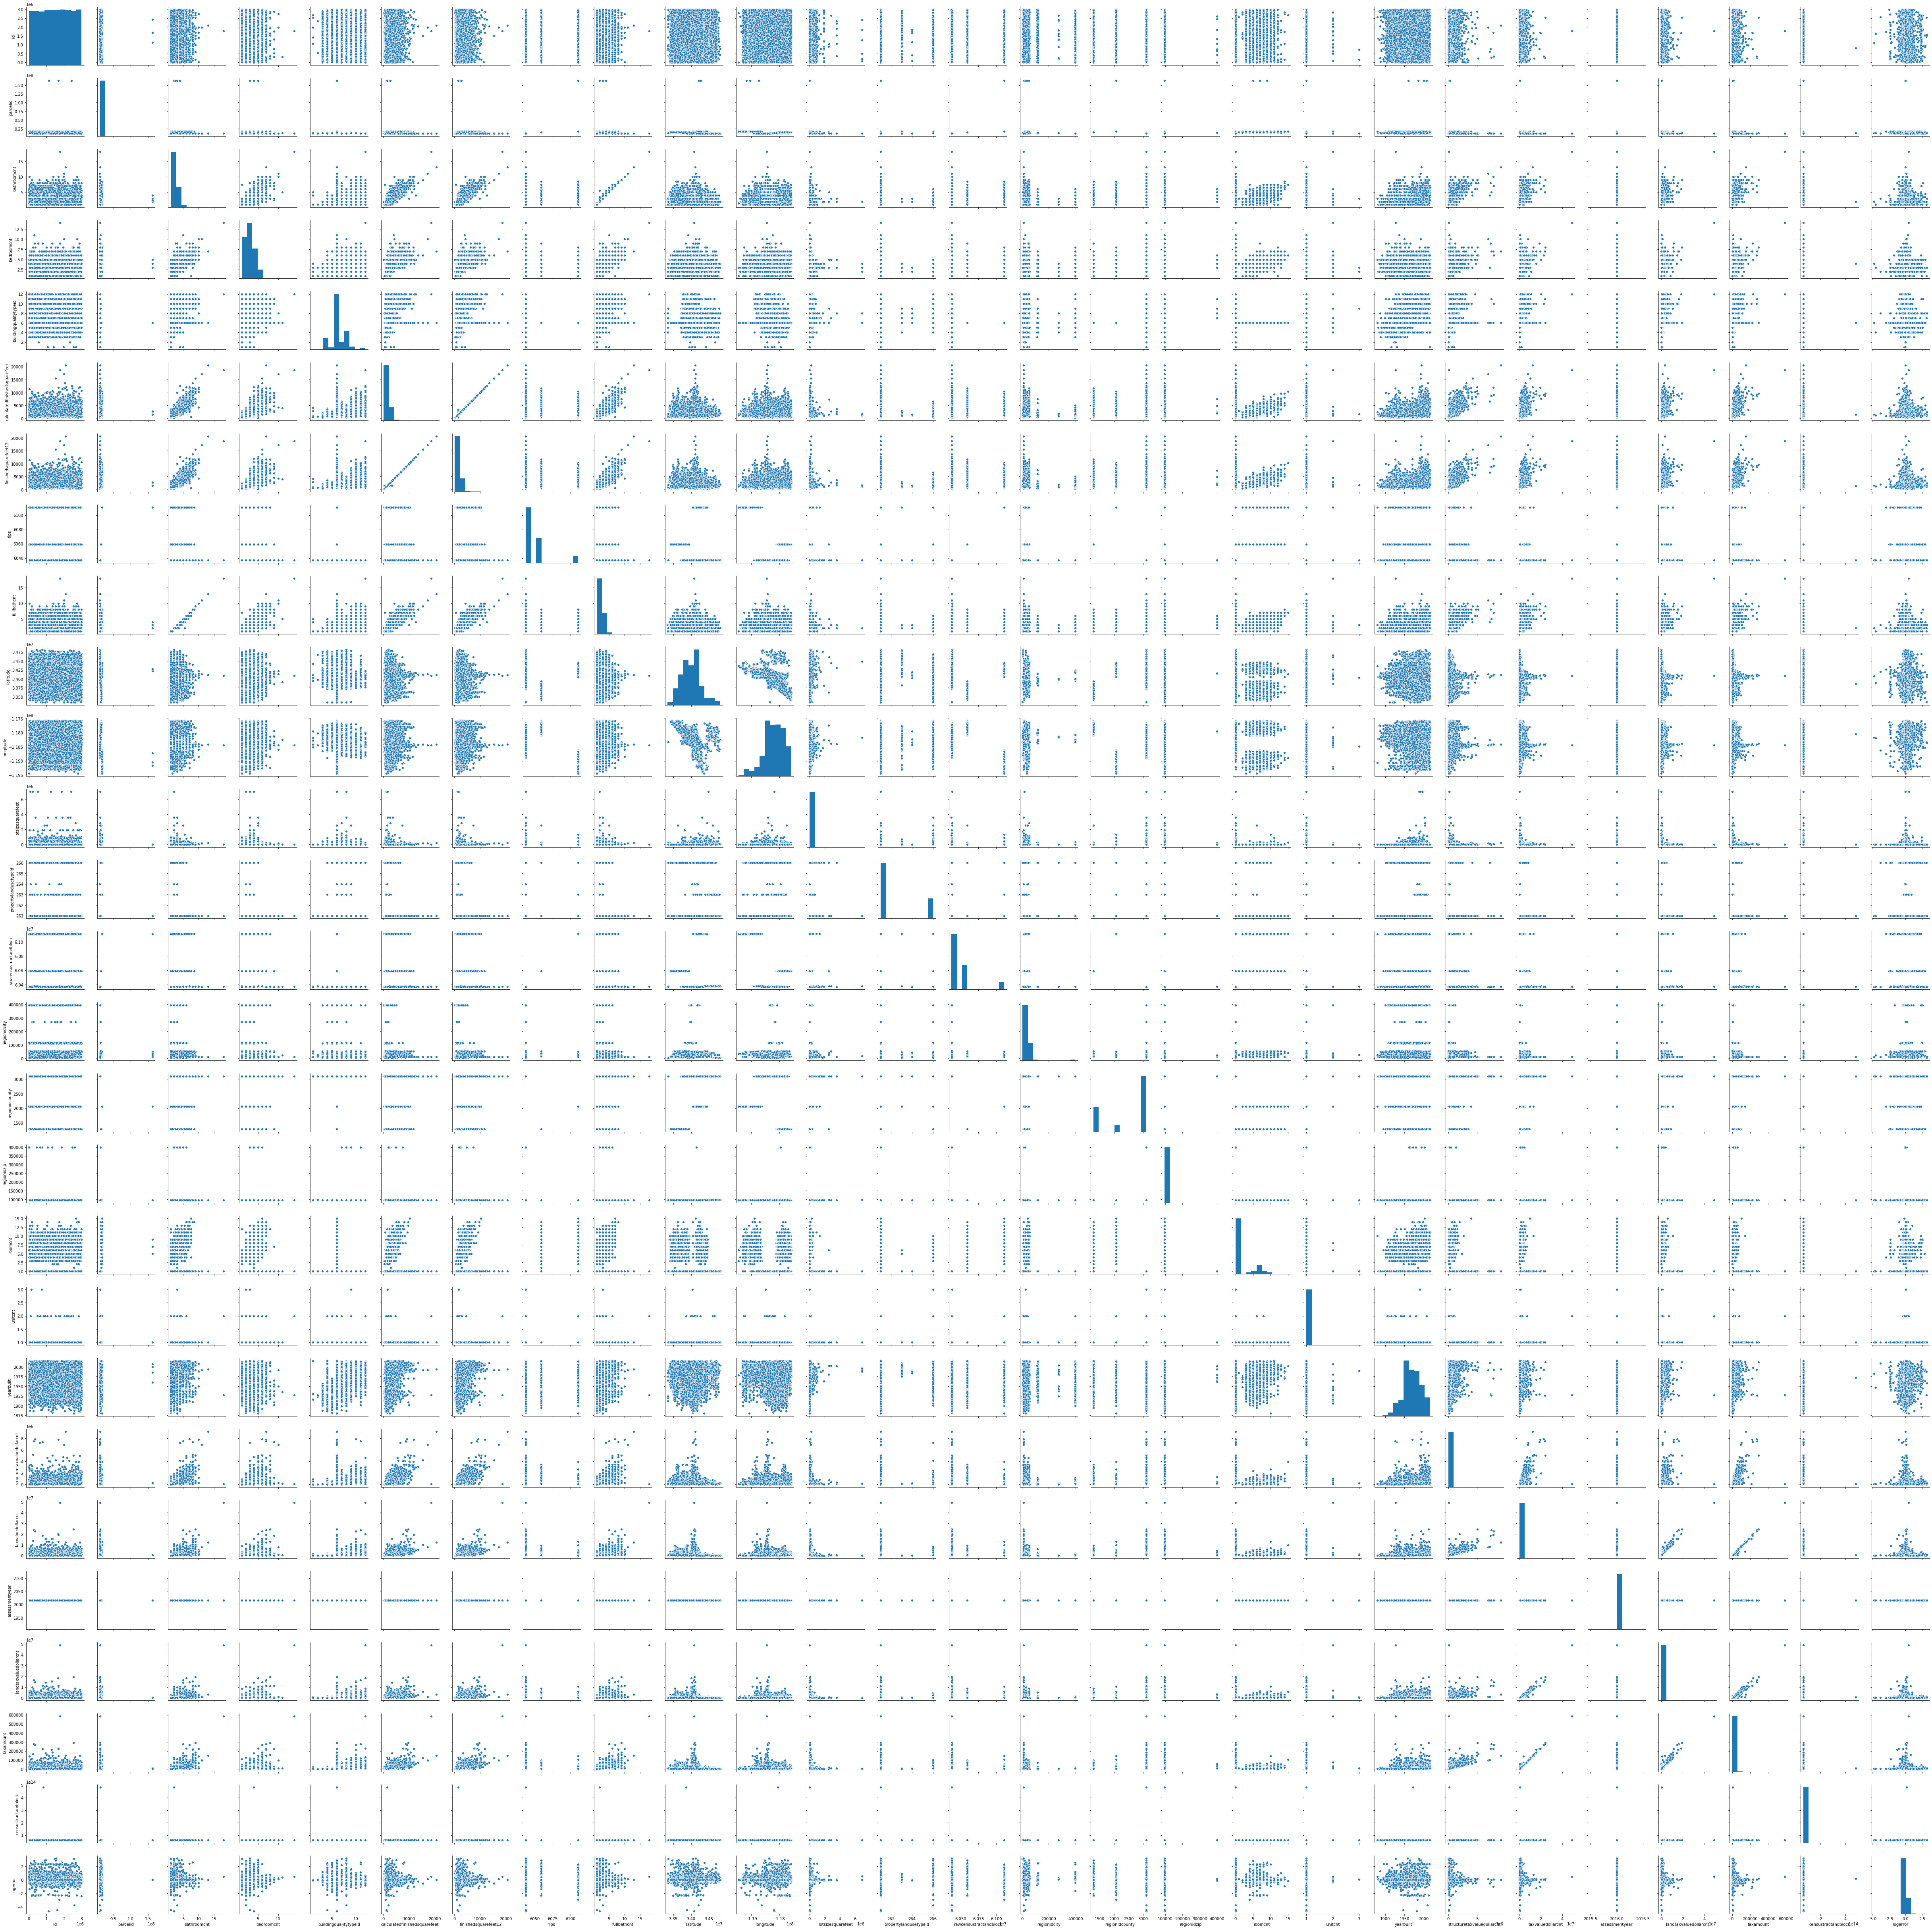

In [4]:
sns.pairplot(train)

## Plot a correlation matrix heatmap.

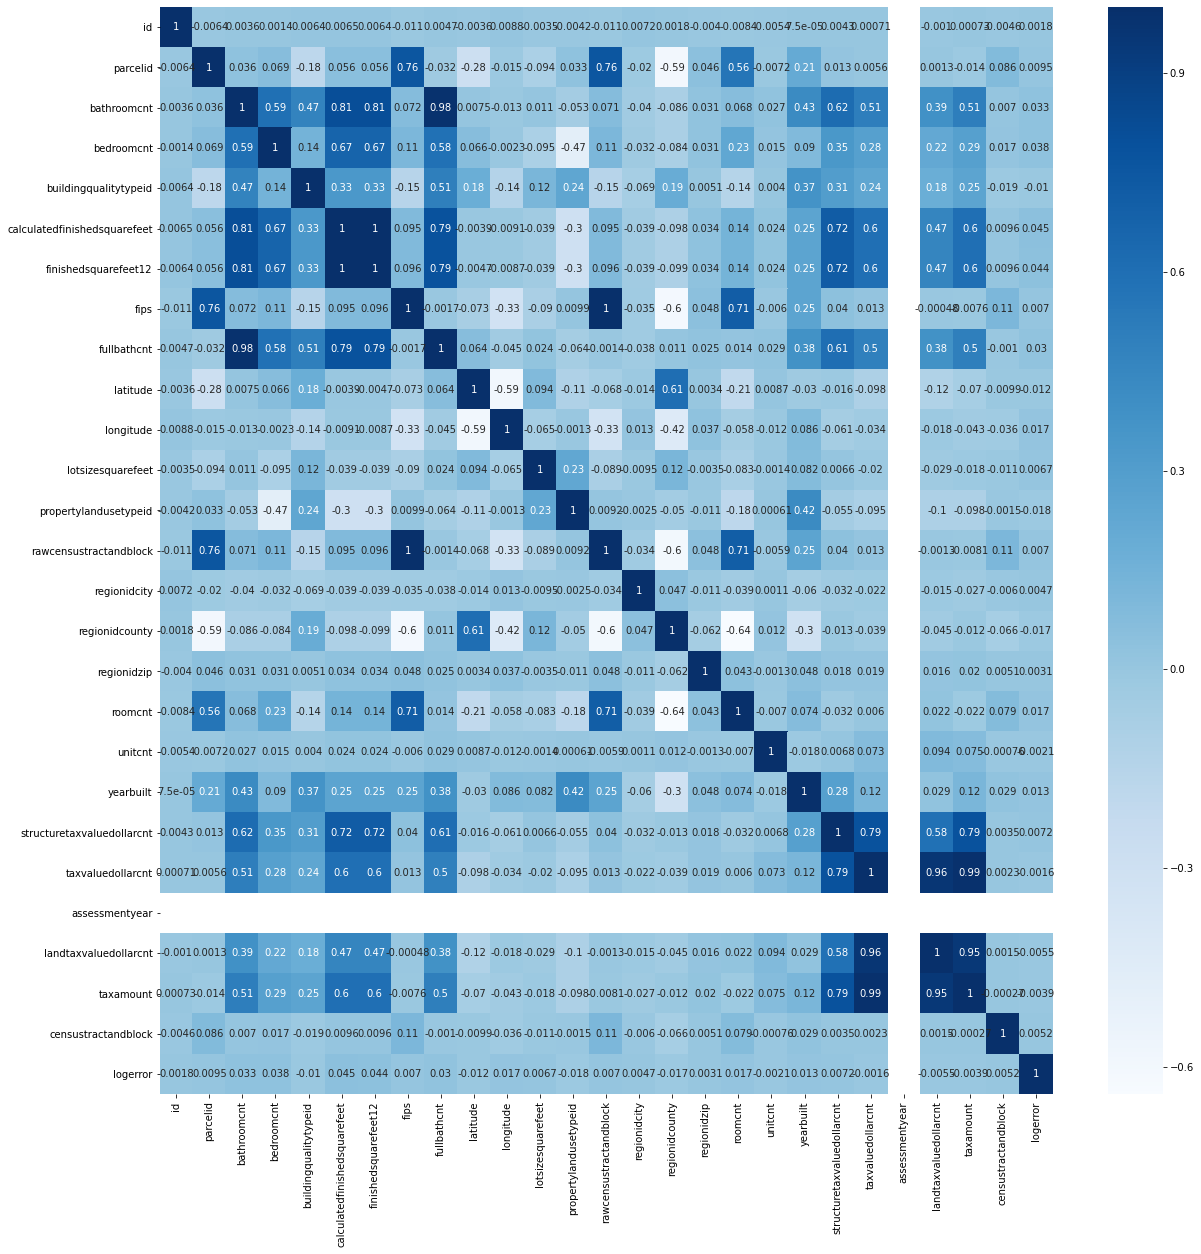

In [5]:
plt.figure(figsize=(20, 20))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

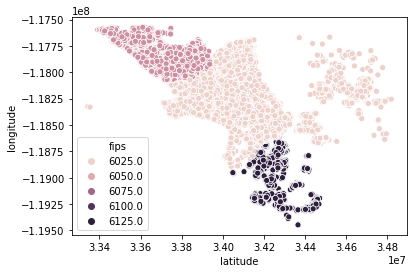

In [6]:
sns.scatterplot(x=train.latitude, y=train.longitude, hue=train.fips)